In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [3]:
df.shape

(284807, 31)

Data contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [4]:
class_counts = df['Class'].value_counts()

Text(0,0.5,u'Frequency')

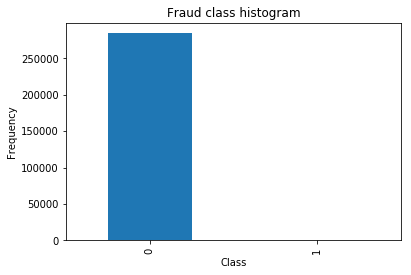

In [5]:
class_counts.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [6]:
class_counts

0    284315
1       492
Name: Class, dtype: int64

The data is clearly unbalanced. Let's run a classifier and see what happens.

In [7]:
#Normalizing the Amount column
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time','Amount'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
inputs = df.drop("Class", axis=1).copy()
target = df["Class"]

In [9]:
#removing header row
X = inputs.values
y = target.values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [11]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_log = round(accuracy_score(y_test,y_pred) * 100, 2)
acc_log

99.92

Let's try some cross-validation

In [12]:
k_fold = KFold(n_splits=5)   
k_fold.get_n_splits(X) #get_n_splits  returns the number of splitting iterations 
accuracies=[]
lr = LogisticRegression()
for train_idx, test_idx in k_fold.split(X):  #split generates indices to split data into training and test set.
    train_X, test_X = X[train_idx], X[test_idx]
    train_y, test_y = y[train_idx], y[test_idx]
    lr.fit(train_X, train_y)
    predictions = lr.predict(test_X)
    accuracy = accuracy_score(test_y, predictions)
    accuracies.append(accuracy)
print("The mean accuracy is: ", np.mean(accuracies))
print(accuracies)

('The mean accuracy is: ', 0.99914679203900081)
[0.99884133281837018, 0.99905199957866653, 0.99910465055037656, 0.99938554449535644, 0.99935043275223401]


Records high accuracy. This is normally the case with imbalance data but it does not show how the classifier is performing with the minority class. Also, if we just used a majority class to assign values to all records, we will still have a high accuracy, BUT WE WOULD BE CLASSIFYING ALL "1"s INCORRECTLY!! 

## Dealing with imbalance data

There are several ways to approach this classification problem taking into consideration this unbalance.
- Collect more data? Nice strategy but not applicable in this case
- Changing the performance metric:
    * Use the confusion matrix to calculate Precision, Recall
    * F1score (weighted average of precision recall)
    * ROC curves - calculates sensitivity/specificity ratio.
- Resampling the dataset
    * Essentially this is a method that will process the data to have an approximate 50-50 ratio.
    * One way to achieve this is by OVER-sampling, which is adding copies of the under-represented class (better when you have little data)
    * Another is UNDER-sampling, which deletes instances from the over-represented class (better when he have lot's of data)

#### Changing the performance metric

In [13]:
confusion_matrix(y_test,y_pred)

array([[71073,    12],
       [   44,    73]])

[TN, FP],
[FN, TP]

In [14]:
f1_score(y_test,y_pred)

0.72277227722772275

F1 = 2 * (precision * recall) / (precision + recall)
F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

In [15]:
precision_score(y_test,y_pred)

0.85882352941176465

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.

In [16]:
recall_score(y_test,y_pred)

0.62393162393162394

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

In [17]:
roc_auc_score(y_test,y_pred)

0.81188140597298641

ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
- True Positive Rate
- False Positive Rate

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. 

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

Text(0,0.5,u'True Positive Rate')

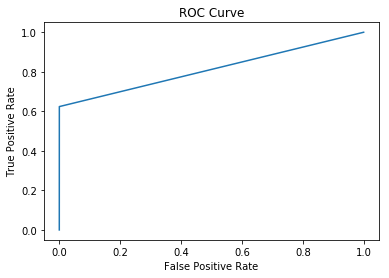

In [19]:
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. 

#### Resampling



SMOTE (Synthetic Minority Over-Sampling Technique) is a combination of oversampling and undersampling, but the oversampling approach is not by replicating minority class but constructing new minority class data instance via an algorithm.

In [20]:
print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

('Number transactions X_train dataset: ', (213605, 29))
('Number transactions y_train dataset: ', (213605,))
('Number transactions X_test dataset: ', (71202, 29))
('Number transactions y_test dataset: ', (71202,))


In [21]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 375
Before OverSampling, counts of label '0': 213230 

After OverSampling, the shape of train_X: (426460, 29)
After OverSampling, the shape of train_y: (426460,) 

After OverSampling, counts of label '1': 213230
After OverSampling, counts of label '0': 213230


In [22]:
clf_smote = LogisticRegression()
clf_smote.fit(x_train_res, y_train_res)
y_pred_smote = clf_smote.predict(x_test)
confusion_matrix(y_test, y_pred_smote)

array([[69303,  1782],
       [   10,   107]])

In [23]:
accuracy_score(y_test, y_pred_smote)

0.97483216763574054

#### Undersampling

In [24]:
# Number of data points in the minority class
number_records_fraud = len(df[df.Class == 1])
fraud_indices = np.array(df[df.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = df[df.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = df.iloc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("normal transactions: ", len(under_sample_data[under_sample_data.Class == 0]))
print("fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1]))
print("Total number of transactions in resampled data: ", len(under_sample_data))

('normal transactions: ', 492)
('fraud transactions: ', 492)
('Total number of transactions in resampled data: ', 984)


In [25]:
# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)

In [26]:
lr_undersample = LogisticRegression()
lr_undersample.fit(X_train_undersample, y_train_undersample)
y_pred_undersample = lr_undersample.predict(X_test_undersample)
acc_undersample = round(accuracy_score(y_test_undersample,y_pred_undersample) * 100, 2)
acc_undersample

/home/shellyann/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


95.27

In [27]:
confusion_matrix(y_test_undersample,y_pred_undersample)

array([[145,   4],
       [ 10, 137]])

In [28]:
fpr, tpr, thresholds = roc_curve(y_test_undersample,y_pred_undersample)

Text(0.5,0,u'False Positive Rate')

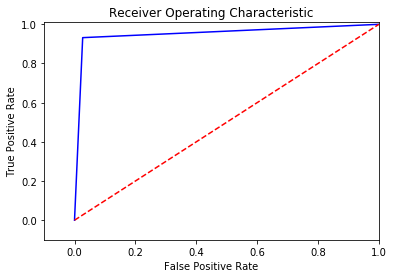

In [29]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')